In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from scipy import stats 
import env
import wrangle
from itertools import combinations

# Hypothesis
- county (fips) has a strong relationship with tax calue dollar count (tvd)
- calculated finished square feet (sqft) has a strong relationship with tvd
- newer homes have a higher tvd 
- homes with more bedrooms and bathrooms have a higher tvd (probably has a strong correlation with sqft
- LA county has the highest value homes, followed by orange then ventura


In [2]:
df = wrangle.get_zillow_data()

In [3]:
df.shape

(52442, 8)

In [4]:
df = wrangle.wrangle_zillow()

In [5]:
df.shape


(51702, 10)

bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, parcelid 

In [6]:
train, validate, test = wrangle.split_zillow_data(df)

In [50]:
columns_corr =train.corr()
columns_corr

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,parcelid,age,fips2
bedroomcnt,1.000000,0.635618,0.632071,0.277196,0.402451,0.280601,0.081588,-0.402451,0.141089
bathroomcnt,0.635618,1.000000,0.842583,0.533649,0.545537,0.537141,0.066013,-0.545537,0.124032
calculatedfinishedsquarefeet,0.632071,0.842583,1.000000,0.602603,0.487785,0.602993,0.067449,-0.487785,0.130842
taxvaluedollarcnt,0.277196,0.533649,0.602603,1.000000,0.221701,0.982508,0.030878,-0.221701,0.059124
yearbuilt,0.402451,0.545537,0.487785,0.221701,1.000000,0.232664,0.167208,-1.000000,0.298666
taxamount,0.280601,0.537141,0.602993,0.982508,0.232664,1.000000,0.009669,-0.232664,0.021062
parcelid,0.081588,0.066013,0.067449,0.030878,0.167208,0.009669,1.000000,-0.167208,0.481635
age,-0.402451,-0.545537,-0.487785,-0.221701,-1.000000,-0.232664,-0.167208,1.000000,-0.298666
fips2,0.141089,0.124032,0.130842,0.059124,0.298666,0.021062,0.481635,-0.298666,1.000000


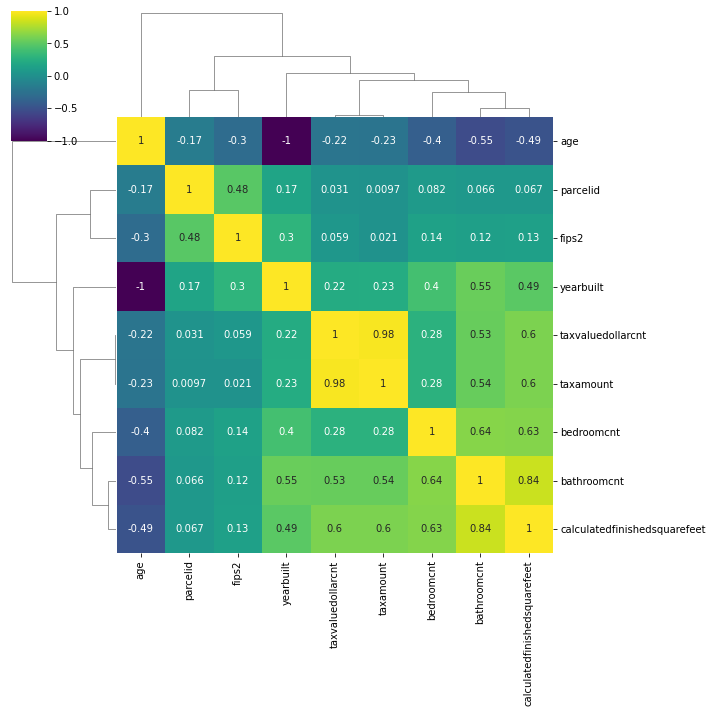

In [8]:
# this will show us how similar two columns are to tell us what columns we may need to ignore. 
sns.clustermap(columns_corr, annot=True,cmap='viridis')

### Takeaway:
- when looking at the taxvaluedollar count, we can see that it is strongly related to tax amount. this strong of a relationship would mess with our exploration/ ML, so we will ignore tax amount when determining our target variable of tax value dollar count

In [9]:
df.fips.value_counts()

LA         33450
Orange     13933
Ventura     4319
Name: fips, dtype: int64

In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,52432,52433,52434,52435,52436,52437,52438,52439,52440,52441
bedroomcnt,4,4,4,4,2,3,4,4,3,4,...,3,3,2,2,3,3,5,3,3,3
bathroomcnt,2.5,2.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,2.0,...,2.0,1.0,1.0,1.0,3.5,2.0,4.0,2.0,2.0,2.0
calculatedfinishedsquarefeet,2490,1808,1878,1207,728,1766,1971,2477,3084,1530,...,1461,1528,1440,630,2636,1681,2614,1472,1190,1160
taxvaluedollarcnt,691000,241131,94598,380736,33497,690762,357708,492107,161912,632982,...,160026,663964,41992,260951,496613,263964,1726940,260732,140428,329029
yearbuilt,1969,1980,1965,1964,1925,1947,1979,2003,1962,1965,...,1961,1929,1927,1947,1957,1989,1929,1980,1983,1960
taxamount,7138.64,3589.81,1415.77,3869.62,974.63,7706.6,3699.5,6014.73,2134.49,6353.2,...,2258.38,7233.9,1037.79,3661.29,5650.12,4189.9,20150.27,2657.14,2638.37,4042.14
fips,Orange,LA,LA,Orange,LA,LA,Orange,LA,LA,Orange,...,Orange,LA,LA,LA,Orange,LA,LA,Orange,LA,LA
parcelid,14381521,11108702,10728687,14376191,12391744,12149843,14353512,11095047,11093045,14411036,...,14024246,12059085,12377528,12379394,14147818,11189104,11627263,14476323,11238725,10727329
age,53,42,57,58,97,75,43,19,60,57,...,61,93,95,75,65,33,93,42,39,62
fips2,6059,6037,6037,6059,6037,6037,6059,6037,6037,6059,...,6059,6037,6037,6037,6059,6037,6037,6059,6037,6037


In [11]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                             object
parcelid                          int64
age                               int64
fips2                             int64
dtype: object

df['fips'].replace({6037 : 'LA' , 6059 : 'Orange' , 6111: 'Ventura'}, inplace = True)

In [12]:
df.fips.value_counts()

LA         33450
Orange     13933
Ventura     4319
Name: fips, dtype: int64

In [13]:
cols = ['bedroomcnt' , 'bathroomcnt']

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

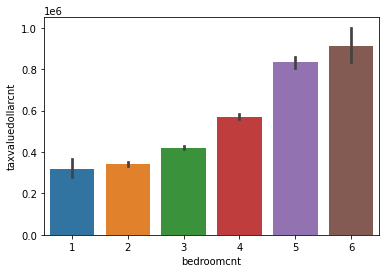

In [14]:
sns.barplot(x ='bedroomcnt', y = 'taxvaluedollarcnt', data = train)

for col in cols:
    sns.lmplot(x = col, y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

sns.lmplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

plt.figure(figsize=(8,6))
sns.heatmap(train, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(train))
plt.ylim(0, 4)

plt.show()

plt.figure(figsize = (8,6))
sns.heatmap(columns, cmap = 'Purple', annot = True, linewidth= .5, mask = np.triu(columns))
plt.ylim(0,4)

plt.show()

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

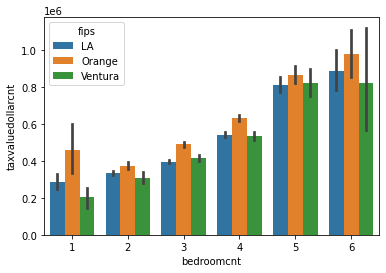

In [15]:
sns.barplot(x ='bedroomcnt', y = 'taxvaluedollarcnt', hue = 'fips', data = train)

<AxesSubplot:xlabel='bathroomcnt', ylabel='taxvaluedollarcnt'>

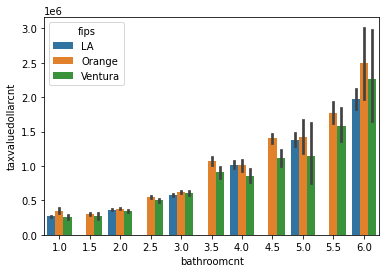

In [16]:
sns.barplot(x ='bathroomcnt', y = 'taxvaluedollarcnt', hue = 'fips', data = train)

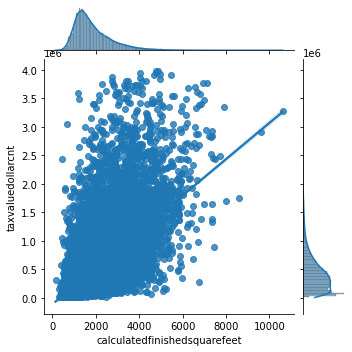

In [17]:
sns.jointplot(x = 'calculatedfinishedsquarefeet' , y = 'taxvaluedollarcnt', data = train, kind = 'reg', height = 5)
plt.show()

## 3 Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [18]:
columns = ['bedroomcnt' , 'bathroomcnt', 'calculatedfinishedsquarefeet' , 'taxvaluedollarcnt','age']

In [19]:
def plot_variable_pairs():
    for col in columns:
        sns.lmplot(x = col, y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

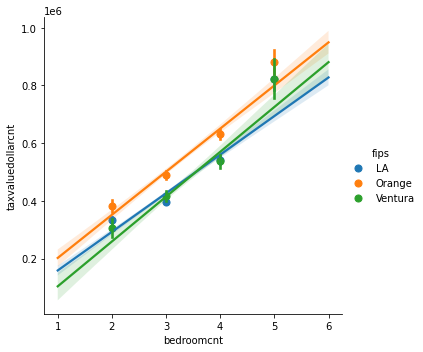

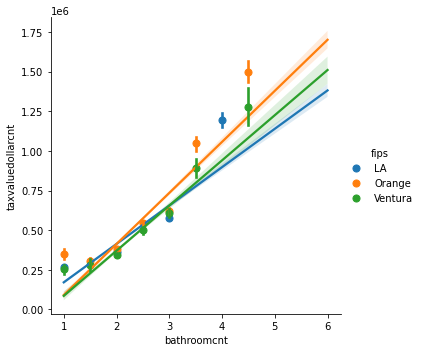

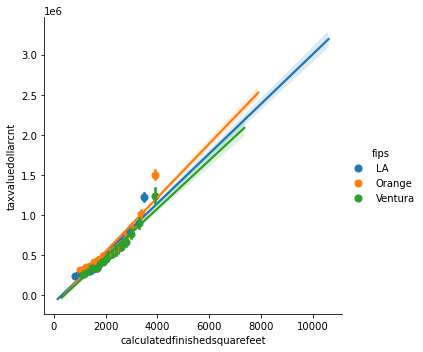

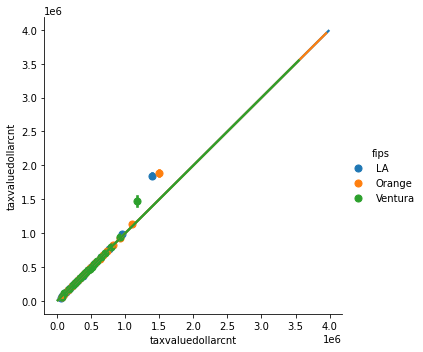

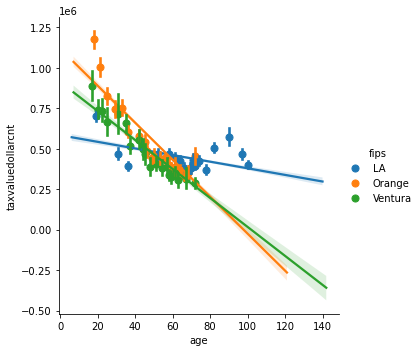

In [20]:
plot_variable_pairs()

In [21]:

def plot_variable_pairs2(df):


    num_cols = [col for col in df.columns if df[col].dtype != 'object']
    cat_cols = [col for col in df.columns if df[col].dtype == 'object']
    
    df_num_cols = df[num_cols]
    corr = df_num_cols.corr()

    plt.figure(figsize=(8,8))
    sns.heatmap(corr, annot=True, cmap="flare", mask=np.triu(corr))
    plt.show()
    
    
    combos = list(combinations(num_cols,2))
    for i in combos:
        sns.lmplot(x=i[0],y=i[1],data=train, hue=cat_cols[0])
        plt.show()

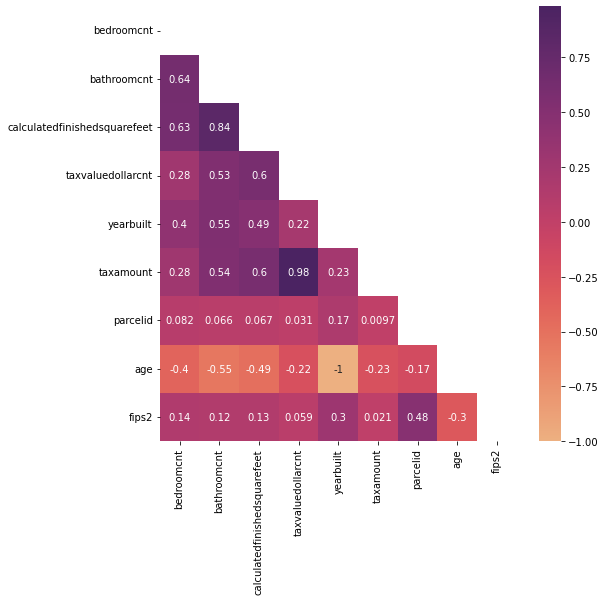

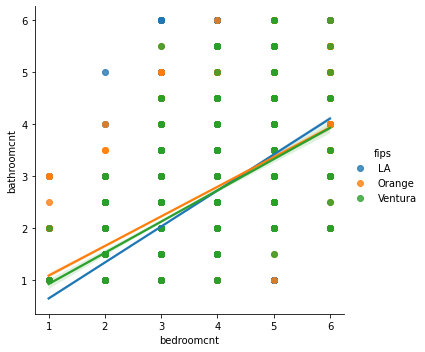

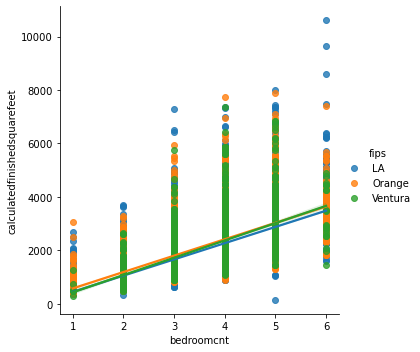

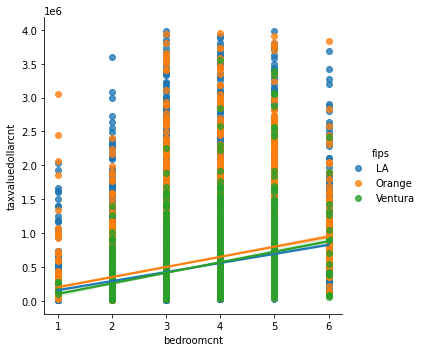

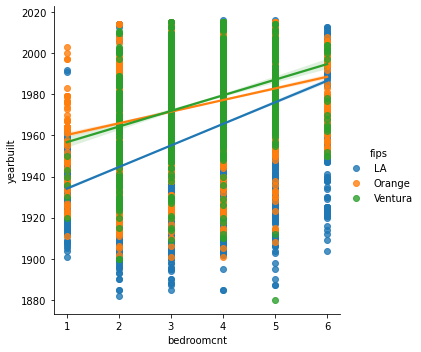

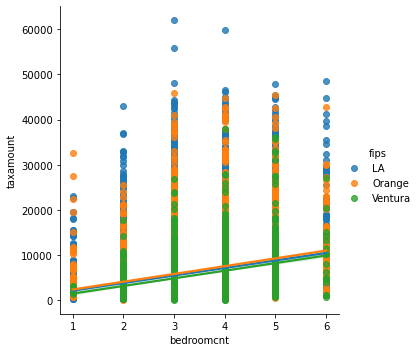

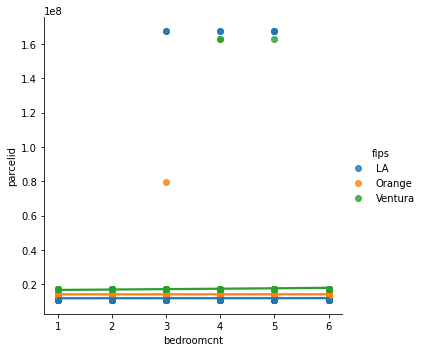

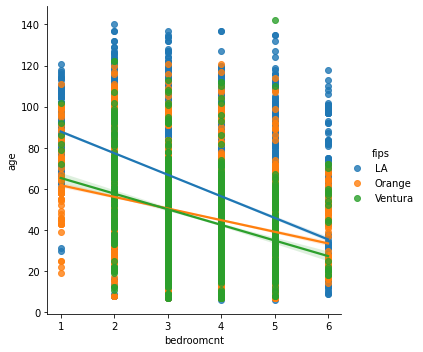

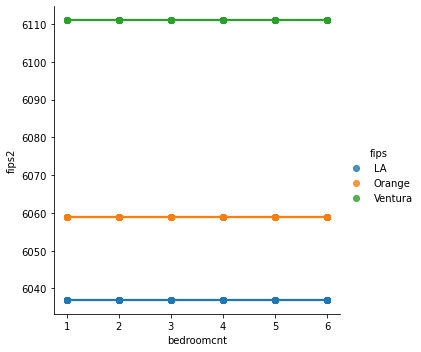

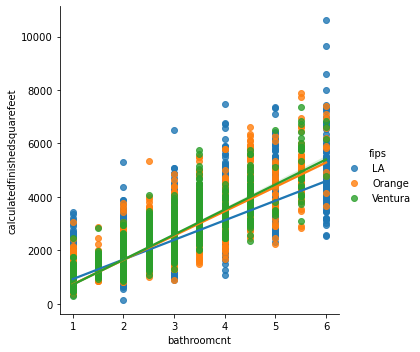

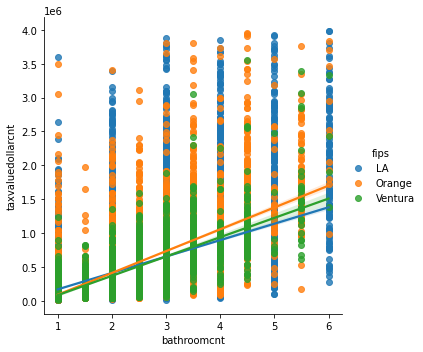

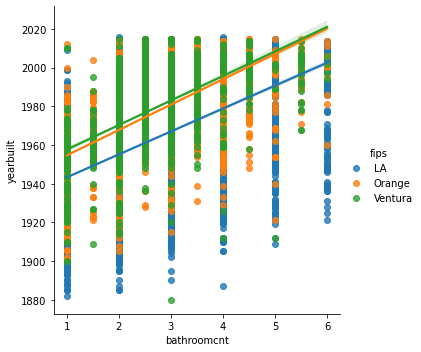

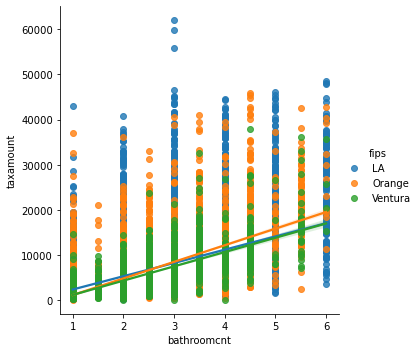

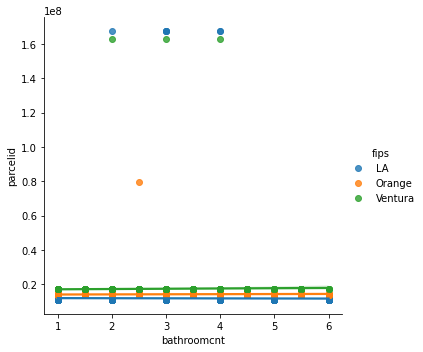

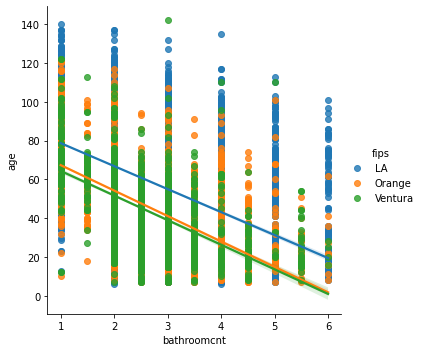

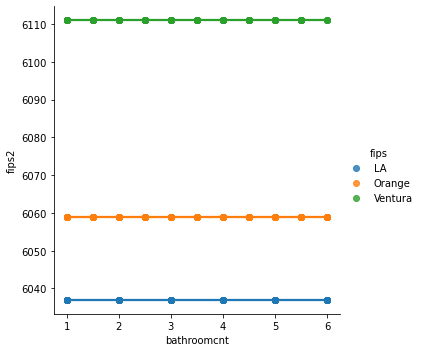

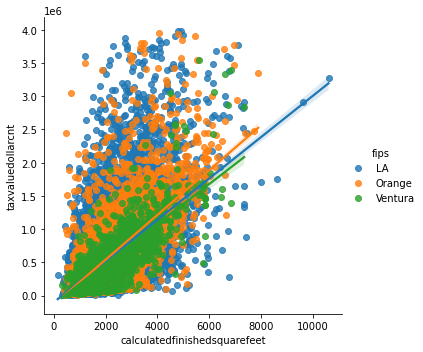

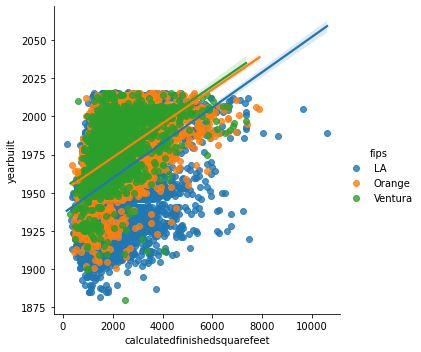

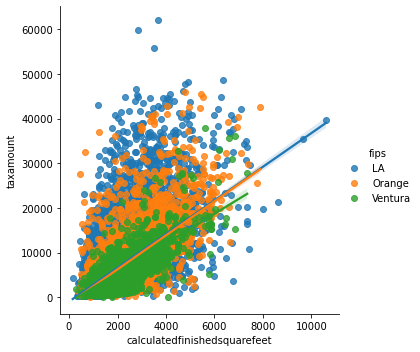

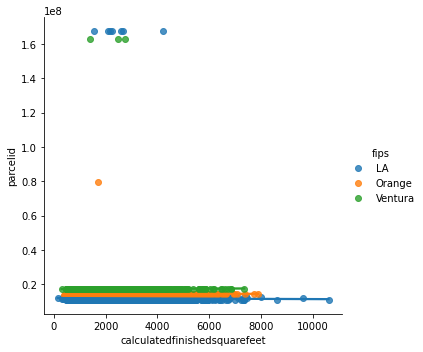

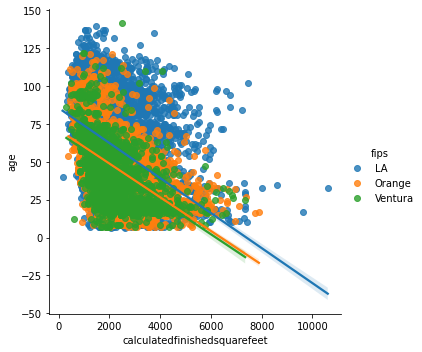

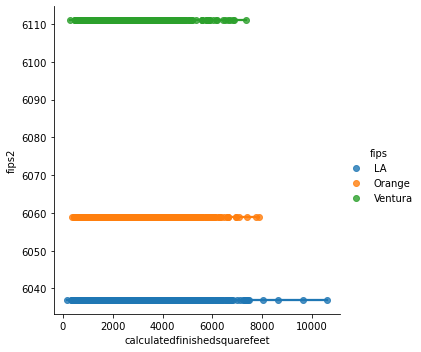

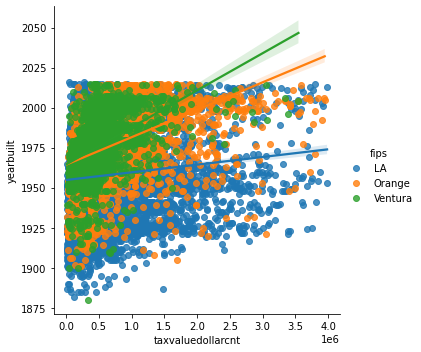

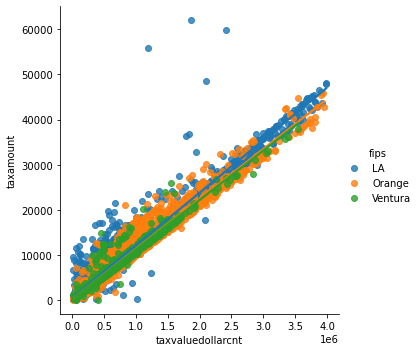

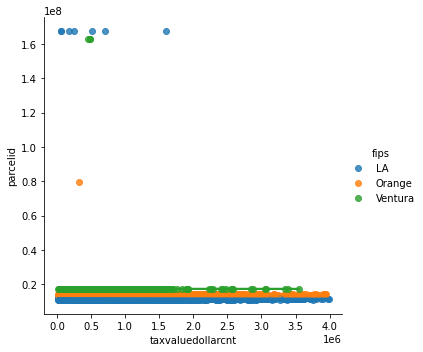

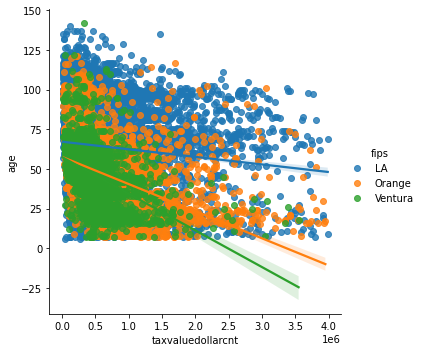

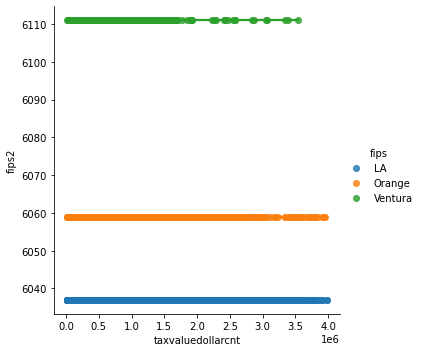

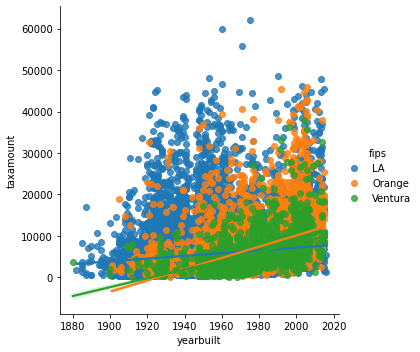

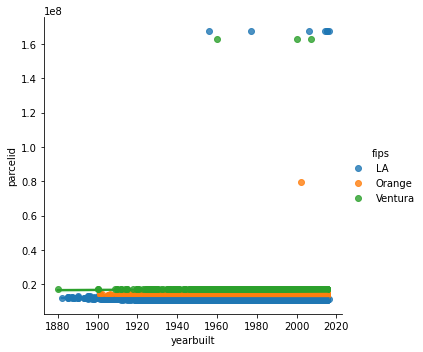

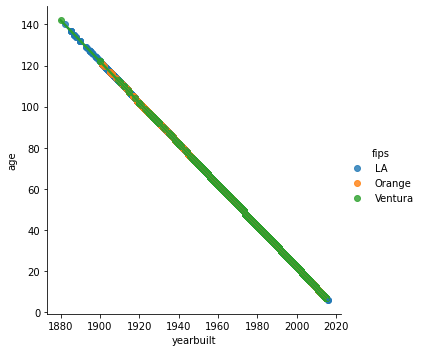

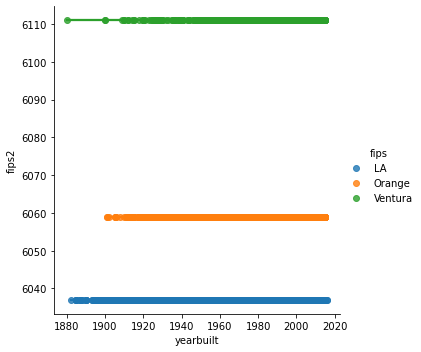

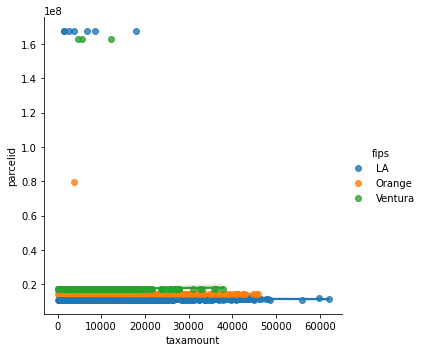

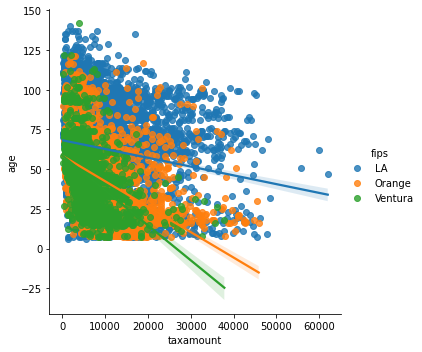

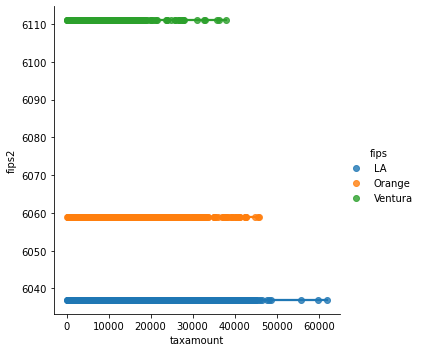

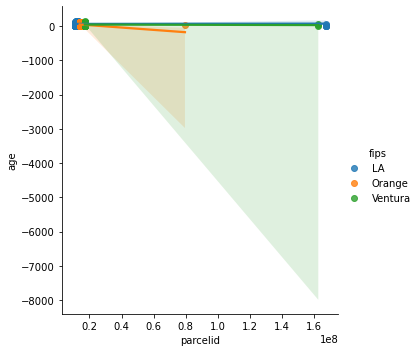

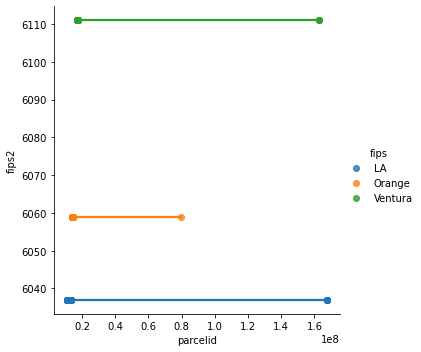

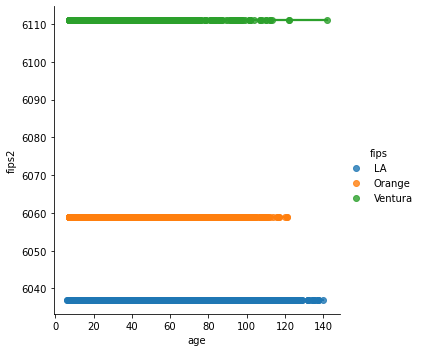

In [22]:
plot_variable_pairs2(train)

In [23]:
train.T

,8519,20153,2353,41153,14841,46039,30538,23142,16130,4587,...,50835,49887,50354,37204,34318,15847,33650,19556,13797,24859
bedroomcnt,5,5,3,4,4,2,3,5,3,3,...,3,2,3,4,3,3,2,3,3,3
bathroomcnt,4.0,3.0,2.5,3.0,2.0,1.0,2.0,2.0,4.0,3.0,...,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
calculatedfinishedsquarefeet,3245,3124,1737,2122,1777,950,1598,1990,2685,2005,...,1774,1664,1607,3455,1472,1536,1874,1466,2063,1107
taxvaluedollarcnt,361765,1612362,947794,488233,386939,117593,63527,636852,1183019,521927,...,796324,298906,74294,1050783,112413,112823,791801,403194,213167,440000
yearbuilt,2000,1924,1966,2014,1976,1924,1941,1965,1981,1954,...,1949,1983,1953,1962,1940,1956,1942,1956,1983,1958
taxamount,5187.9,19493.37,10221.42,8989.59,4159.1,1656.7,880.78,7915.64,14485.18,5767.56,...,9703.53,4008.44,1036.15,11313.44,1490.83,1543.72,9147.37,4858.12,2737.8,5257.08
fips,LA,LA,Orange,LA,Ventura,Orange,LA,LA,LA,LA,...,LA,Orange,LA,Orange,LA,LA,LA,Orange,LA,Orange
parcelid,11261031,12033391,14294536,11158611,17273951,13845929,11724454,12611645,11691954,10952662,...,10855745,14196743,10823544,14243171,11669191,10817039,12118110,13992985,10922762,14022673
age,22,98,56,8,46,98,81,57,41,68,...,73,39,69,60,82,66,80,66,39,64
fips2,6037,6037,6059,6037,6111,6059,6037,6037,6037,6037,...,6037,6059,6037,6059,6037,6037,6037,6059,6037,6059


In [24]:
df.yearbuilt.min()

1878

In [25]:
df.yearbuilt.value_counts()

1955    1893
1950    1599
1954    1512
1953    1481
1956    1380
        ... 
1892       1
1878       1
1882       1
1880       1
1894       1
Name: yearbuilt, Length: 133, dtype: int64

In [26]:
df.bedroomcnt.value_counts()

3    23304
4    15132
2     8315
5     3824
1      599
6      528
Name: bedroomcnt, dtype: int64

In [27]:
df.bathroomcnt.value_counts()

2.0    21862
3.0    10614
1.0     9533
2.5     3929
4.0     2172
3.5      901
1.5      840
5.0      736
4.5      659
6.0      247
5.5      209
Name: bathroomcnt, dtype: int64

In [28]:
df.loc[df.bathroomcnt == 1.5]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,age,fips2
71,4,1.5,1016,319266,1953,3908.82,Orange,13842260,69,6059
91,4,1.5,2196,243271,1925,2787.54,Orange,14240723,97,6059
98,2,1.5,1008,332406,1964,4022.12,Orange,14286031,58,6059
243,3,1.5,1293,193379,1954,2588.92,Orange,13930506,68,6059
568,3,1.5,1000,315758,1955,3900.46,Orange,13991609,67,6059
...,...,...,...,...,...,...,...,...,...,...
51950,2,1.5,960,425000,1969,5233.06,Orange,13878693,53,6059
52104,2,1.5,957,330000,1983,3378.52,Orange,14394159,39,6059
52235,3,1.5,1242,237772,1965,2880.84,Orange,14108307,57,6059
52247,2,1.5,1235,63728,1955,977.00,Orange,14260441,67,6059


In [29]:
def plot_categorical_and_continuous_vars(df, continuous, categorical):

    plot_list = []
    for cat in categorical:
        for cont in continuous:
            plot_list.append([cat, cont])
    
    for i in plot_list:
        plt.figure(figsize=(18, 5))
        plt.subplot(131)
        sns.boxplot(x=i[0], y=i[1], data=df)
#         sns.histplot(data = df, x = i[1], hue = 'county', element = 'step', bins =20)
        plt.subplot(132)
        sns.stripplot(x=i[0], y=i[1], data=df)
        plt.subplot(133)
        sns.violinplot(x=i[0], y=i[1], data=df)
#         sns.barplot(x=i[0], y=i[1], data=df)
        plt.show()

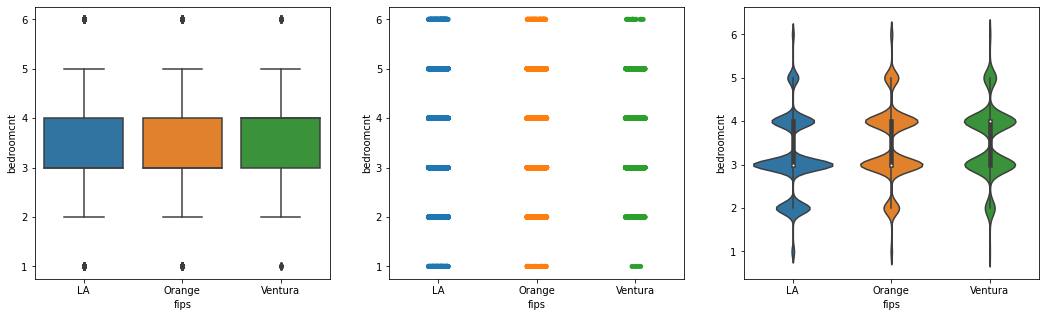

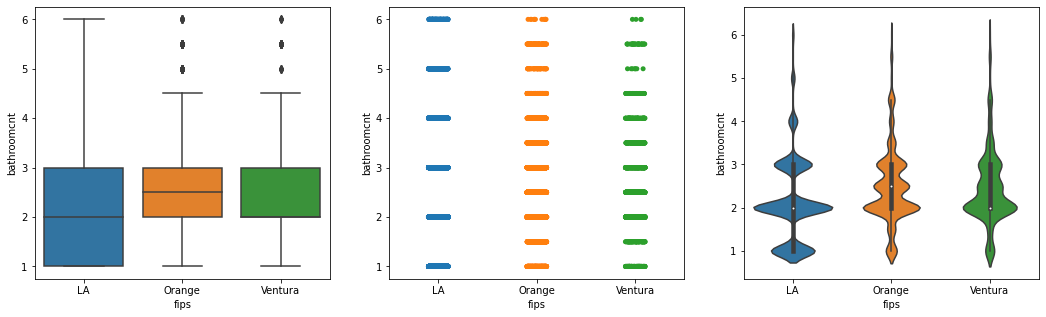

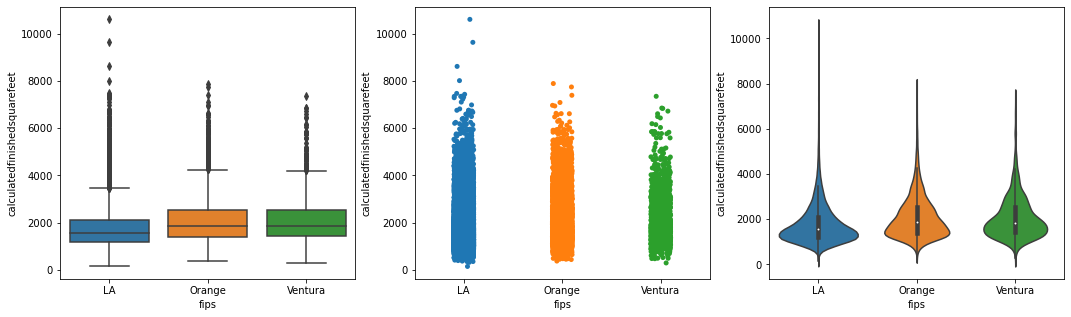

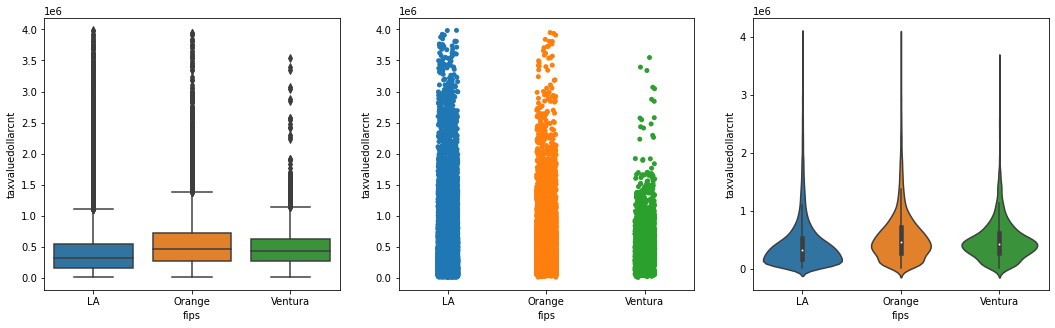

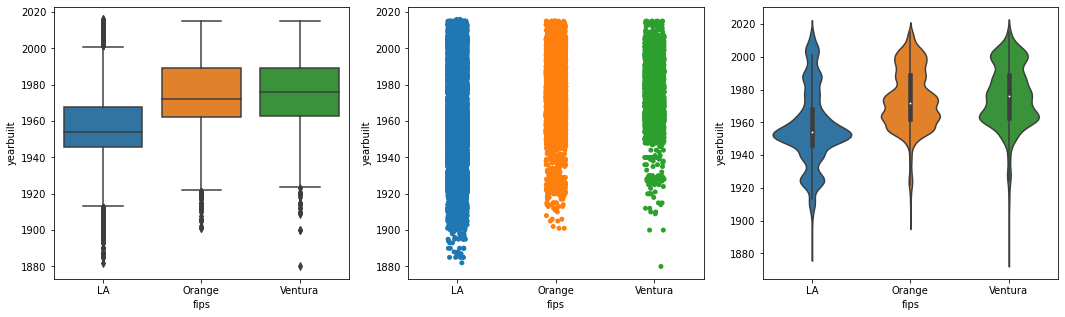

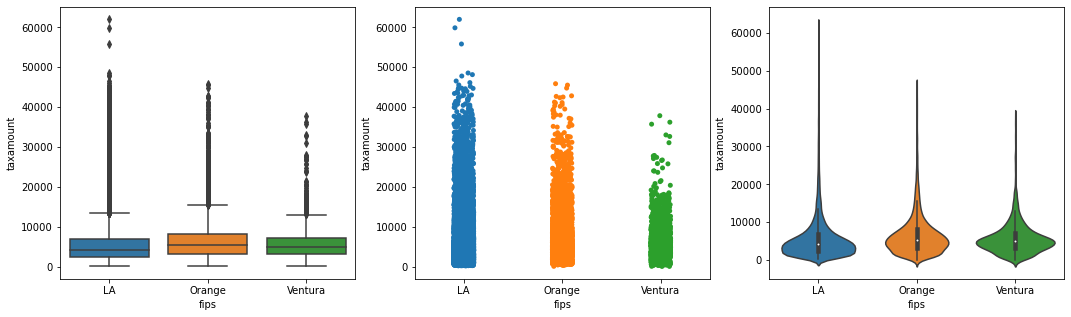

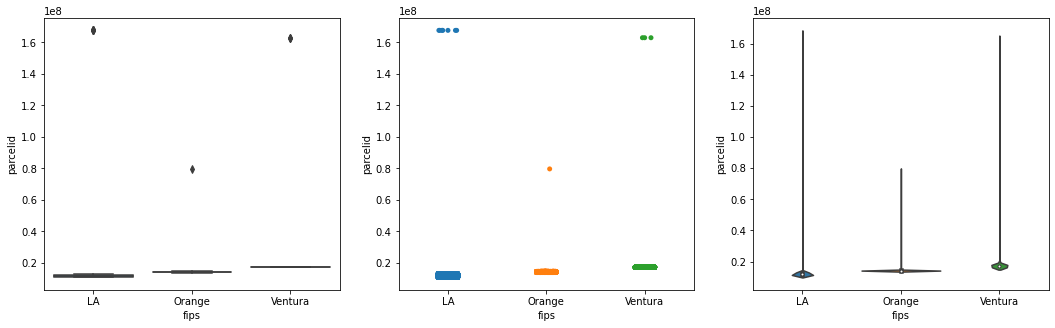

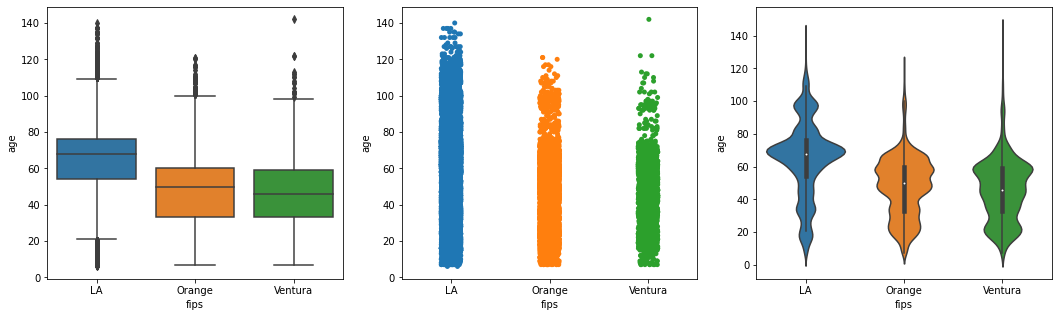

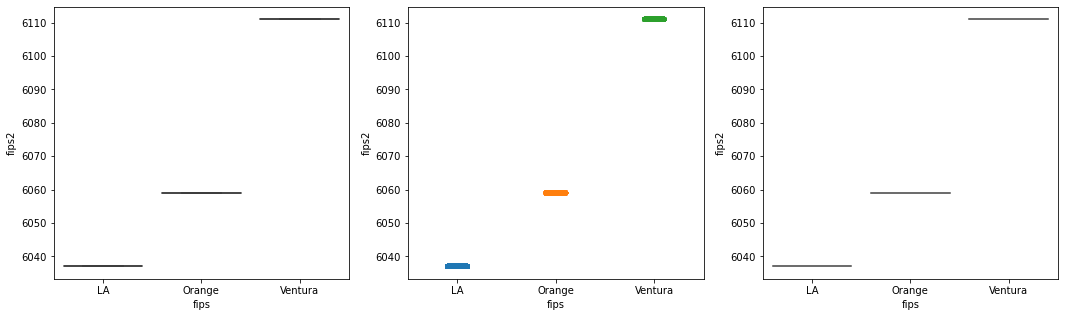

In [30]:
plot_categorical_and_continuous_vars(train, df.select_dtypes(include = 'number').columns,['fips'])

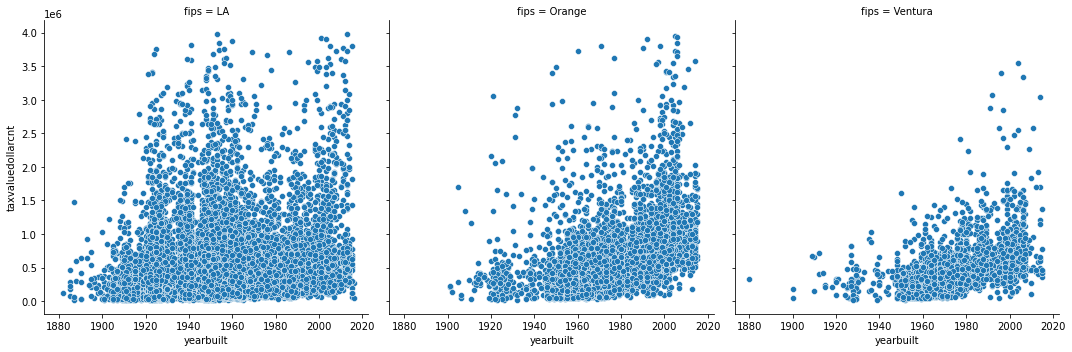

In [31]:
sns.relplot(x="yearbuilt", y="taxvaluedollarcnt", data=train,  kind='scatter', height=5, col='fips')
plt.show()

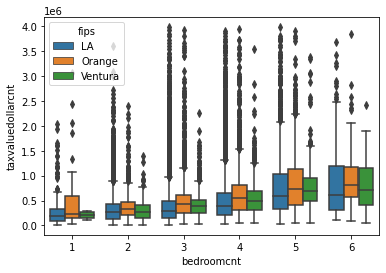

In [32]:
sns.boxplot(x="bedroomcnt", y="taxvaluedollarcnt", data=train, hue='fips')
plt.show()

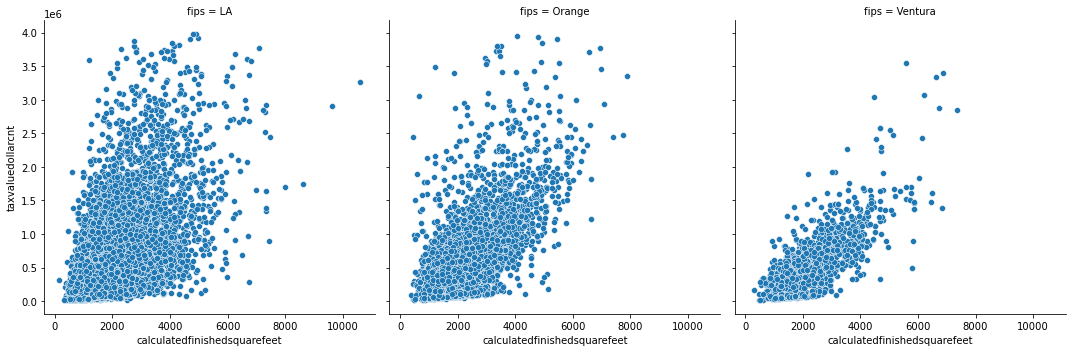

In [33]:
sns.relplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt", data=train,  kind='scatter', height=5, col='fips')
plt.show()

In [34]:

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df2=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df2

In [35]:
df2=remove_outlier_IQR(df)

In [36]:
df2

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,age,fips2
0,4.0,2.5,2490.0,691000.0,1969.0,7138.64,Orange,14381521.0,53.0,6059.0
1,4.0,2.0,1808.0,241131.0,1980.0,3589.81,LA,11108702.0,42.0,6037.0
2,4.0,2.0,1878.0,94598.0,1965.0,1415.77,LA,10728687.0,57.0,6037.0
3,4.0,2.0,1207.0,380736.0,1964.0,3869.62,Orange,14376191.0,58.0,6059.0
4,2.0,1.0,728.0,33497.0,1925.0,974.63,LA,12391744.0,97.0,6037.0
...,...,...,...,...,...,...,...,...,...,...
52437,3.0,2.0,1681.0,263964.0,1989.0,4189.90,LA,11189104.0,33.0,6037.0
52438,5.0,4.0,2614.0,NaN,1929.0,NaN,LA,11627263.0,93.0,6037.0
52439,3.0,2.0,1472.0,260732.0,1980.0,2657.14,Orange,14476323.0,42.0,6059.0
52440,3.0,2.0,1190.0,140428.0,1983.0,2638.37,LA,11238725.0,39.0,6037.0


In [37]:
df2.shape

(51702, 10)

In [38]:
df.shape

(51702, 10)

In [39]:
df.loc[df.groupby('fips')['taxvaluedollarcnt'].idxmin()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,age,fips2
39498,3,4.0,3284,1000,1985,816.49,LA,11137835,37,6037
18245,2,1.0,880,13524,1932,85.94,Orange,14506953,90,6059
48988,2,1.0,500,9242,1939,1016.38,Ventura,17067445,83,6111


In [40]:
df.loc[df.groupby('fips')['taxvaluedollarcnt'].idxmax()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,age,fips2
48784,3,6.0,4892,3984381,1953,48135.02,LA,11641837,69,6037
5144,5,4.5,3731,3952896,2007,42449.94,Orange,13890935,15,6059
7707,5,5.5,6384,3698000,2006,39496.20,Ventura,17292893,16,6111


In [41]:
df.loc[df.groupby('bedroomcnt')['taxvaluedollarcnt'].idxmax()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,age,fips2
13999,1,1.0,670,3055787,1921,32558.32,Orange,14330409,101,6059
323,2,2.0,1482,3822146,1948,45676.36,LA,11668728,74,6037
48784,3,6.0,4892,3984381,1953,48135.02,LA,11641837,69,6037
24889,4,4.5,4167,3952896,2004,42850.54,Orange,14329045,18,6059
10517,5,6.0,4783,3981978,2013,47785.18,LA,11568321,9,6037
12776,6,6.0,4941,3839683,2006,42680.98,Orange,14080126,16,6059


In [42]:
def explore_bivariate_continuous(target, cont_vars, train):
    
    for var in cont_vars:
        sns.relplot(x=var, y=target, data=train)
        plt.show()
        
        corr, p = stats.pearsonr(train[var], train[target])
        
        print("-------------------------------")
        print(f"Correlation between {var} and {target}:  {corr}")
        print(f"P value:  {p}")
        print()

In [43]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                             object
parcelid                          int64
age                               int64
fips2                             int64
dtype: object

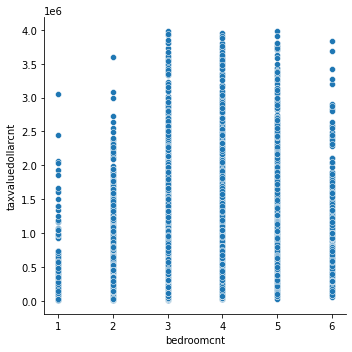

-------------------------------
Correlation between bedroomcnt and taxvaluedollarcnt:  0.27719643069472344
P value:  0.0



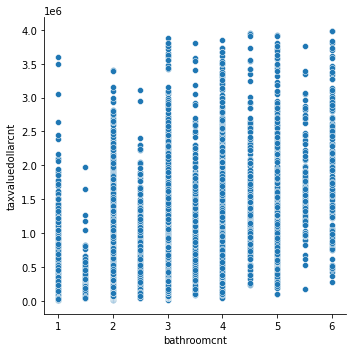

-------------------------------
Correlation between bathroomcnt and taxvaluedollarcnt:  0.5336488614827488
P value:  0.0



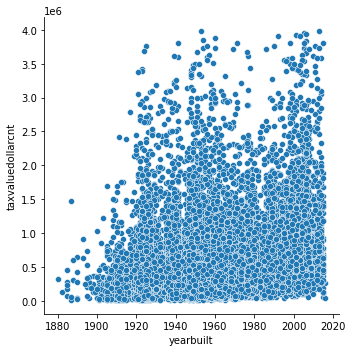

-------------------------------
Correlation between yearbuilt and taxvaluedollarcnt:  0.22170107312039894
P value:  3.0717e-319



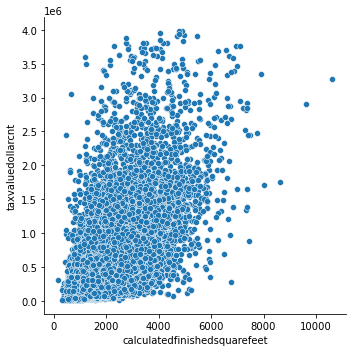

-------------------------------
Correlation between calculatedfinishedsquarefeet and taxvaluedollarcnt:  0.6026034514097558
P value:  0.0



In [44]:
explore_bivariate_continuous('taxvaluedollarcnt' , ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet'] , train)

In [45]:
cont_vars = ("bedroomcnt", 
             "bathroomcnt",
             "calculatedfinishedsquarefeet",
             "yearbuilt")

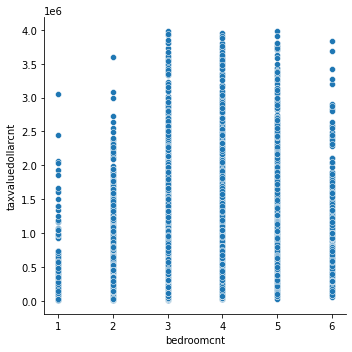

-------------------------------
Correlation between bedroomcnt and taxvaluedollarcnt:  0.27719643069472344
P value:  0.0



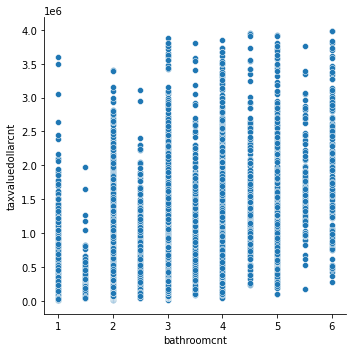

-------------------------------
Correlation between bathroomcnt and taxvaluedollarcnt:  0.5336488614827488
P value:  0.0



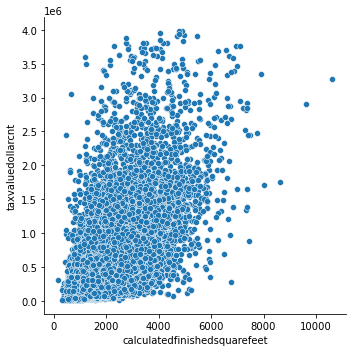

-------------------------------
Correlation between calculatedfinishedsquarefeet and taxvaluedollarcnt:  0.6026034514097558
P value:  0.0



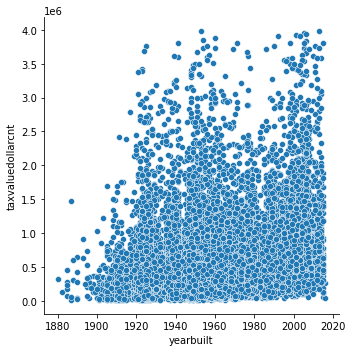

-------------------------------
Correlation between yearbuilt and taxvaluedollarcnt:  0.22170107312039894
P value:  3.0717e-319



In [46]:
explore_bivariate_continuous('taxvaluedollarcnt' , cont_vars , train)

In [47]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        _explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = _explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

In [48]:
explore_univariate(train, ['fips'] , ['bedroomcnt'])

NameError: name '_explore_univariate_categorical' is not defined

In [ ]:
df.fips.value_counts()

In [ ]:
df.shape

In [ ]:
print('A majority of the properties were sold in LA county {}%'.format(round(33498/51774*100)))

In [ ]:
df.bathroomcnt.value_counts()

# MODELING